#**신경망의 수학적 구성 요소**

###신경망과의 첫 만남

**케라스에서 MNIST 데이터셋 적재하기**

In [6]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
#mnist.load.data() : 훈련 이미지와 정답으로 구성된 훈련 세트와, 테스트 이미지와 정답으로 구성된 테스트 세트를 포함

In [7]:
train_images.shape #train_images의 형태 (28x28 사이즈가 6만개)

(60000, 28, 28)

In [8]:
len(train_labels) 

60000

In [9]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [10]:
test_images.shape #test_images의 형태 (28x28 사이즈가 1만개)

(10000, 28, 28)

In [11]:
len(test_labels)

10000

In [12]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

**신경망 구조**

In [14]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(512, activation="relu"), #hiddenlayers의 개수가 512개, 활성함수 relu
    layers.Dense(10, activation="softmax") #출력노드의 개수가 10개, 활성함수 softmax
])

**컴파일 단계**

In [15]:
model.compile(optimizer="rmsprop", #학습과정에서 파라미터를 최적화해줌
              loss="sparse_categorical_crossentropy", #정답과 모델이 학습한 값의 차이
              metrics=["accuracy"]) #혼동행렬(Confusion metrics)에서의 정확도 : TP+TN/TP+FN+TN+FP

**이미지 데이터 준비하기**

In [16]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255 #0에서 1사이로 바꿔주기 위하여 255로 나누었음
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255 #0에서 1사이로 바꿔주기 위하여 255로 나누었음

**모델 훈련하기**

In [18]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)
#model.fit : 모델을 학습시키기 위한 method
#batch_size : 한 번에 처리할 샘플의 양
#epochs : 전체 트레이닝 데이터를 전부 사용하여 학습을 반복하는 횟수

Epoch 1/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0286 - accuracy: 0.9917
Epoch 2/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0218 - accuracy: 0.9935
Epoch 3/5
469/469 [==============================] - 6s 13ms/step - loss: 0.0172 - accuracy: 0.9953
Epoch 4/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0120 - accuracy: 0.9969
Epoch 5/5
469/469 [==============================] - 6s 13ms/step - loss: 0.0094 - accuracy: 0.9978


**모델을 사용하여 예측 만들기**

In [20]:
test_digits = test_images[0:10]
predictions = model.predict(test_digits) #test_digits에 대한 예측 생성
predictions[2]

1/1 [==============================] - 0s 121ms/step


array([1.4350529e-09, 9.9982667e-01, 5.1462146e-05, 1.2500209e-07,
       1.5633863e-05, 6.8036815e-07, 1.0900606e-06, 4.4268683e-05,
       6.0006045e-05, 1.4814667e-07], dtype=float32)

In [22]:
predictions[2].argmax()

1

In [23]:
predictions[2][7]

4.4268683e-05

**새로운 데이터에서 모델 평가하기**

In [21]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"테스트 정확도: {test_acc}")
# 테스트가 반복될수록 정확도는 올라간다

313/313 [==============================] - 2s 5ms/step - loss: 0.0627 - accuracy: 0.9819
테스트 정확도: 0.9818999767303467


###신경망을 위한 데이터 표현

**스칼라 (랭크-0 텐서)**

In [25]:
import numpy as np
x = np.array(12)
x

array(12)

In [26]:
x.ndim

0

**벡터 (랭크-1 텐서)**

In [29]:
x = np.array([12, 3, 6, 14, 7])
x

array([12,  3,  6, 14,  7])

In [30]:
x.ndim

1

**행렬 (랭크-2 텐서)**

In [28]:
x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])
x.ndim

2

**랭크-3 텐서와 더 높은 랭크의 텐서**

In [32]:
x = np.array([[[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]]])
x.ndim

3

**핵심 속성**

In [33]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [34]:
train_images.ndim

3

In [35]:
train_images.shape

(60000, 28, 28)

In [37]:
train_images.dtype #부호 없는 8비트 정수

dtype('uint8')

**다섯번째 이미지 출력하기**

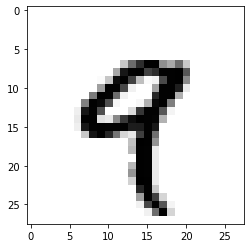

In [38]:
import matplotlib.pyplot as plt
digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [39]:
train_labels[4]

9

**넘파이로 텐서 조작하기**

In [43]:
my_slice = train_images[10:100] #인덱스 10에서 99까지 slicing
my_slice.shape

(90, 28, 28)

In [44]:
my_slice = train_images[10:100, :, :] #인덱스 10부터 99까지 모두 slicing
my_slice.shape

(90, 28, 28)

In [45]:
my_slice = train_images[10:100, 0:28, 0:28] #인덱스 10에서 99까지, 각 이미지를 0에서 27행까지의 픽셀을 slicing
my_slice.shape

(90, 28, 28)

In [48]:
my_slice = train_images[:, 14:, 14:] #모든 이미지에 대해 인덱스 14부터 마지막까지의 픽셀을 slicing
my_slice.shape

(60000, 14, 14)

In [50]:
my_slice = train_images[:, 7:-7, 7:-7] #모든 이미지에 대해 인덱스 7부터 뒤에서 7번째 인덱스까지의 픽셀을 slicing
my_slice.shape

(60000, 14, 14)

**배치 데이터**

In [52]:
batch = train_images[:128] #첫번째 배치

In [53]:
batch = train_images[128:256] #두번째 배치

In [54]:
n = 3
batch = train_images[128 * n:128 * (n+1)] #n번째 배치